<a href="https://colab.research.google.com/github/hernandezhdd/Machine-Learning-Stanford/blob/main/ex4_py/ex4_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4 Python: Regularized Linear Regression and Bias-Variance

### Download files from Exercise 4 GitHub folder

Run the next two cells to download the necessary function files, scripts and datasets.

In [ ]:
!apt install subversion

In [ ]:
!svn checkout https://github.com/hernandezhdd/Machine-Learning-Stanford/trunk/ex4_py

### Move files to /content folder

In [ ]:
!mv  -v ../content/ex4_py/* ../content/

In [8]:
# %% Machine Learning Online Class - Exercise 4 Neural Network Learning

# %  Instructions
# %  ------------
# % 
# %  This file contains code that helps you get started on the
# %  linear exercise. You will need to complete the following functions 
# %  in this exericse:
# %
# %     sigmoidGradient.m
# %     randInitializeWeights.m
# %     nnCostFunction.m
# %
# %  For this exercise, you will not need to change any code in this file,
# %  or any other files other than those mentioned above.

In [35]:
print('Loading and Visualizing Data ...\n')

Loading and Visualizing Data ...



In [51]:
import scipy.io as scio

# %% Setup the parameters you will use for this exercise
input_layer_size  = 400  #% 20x20 Input Images of Digits
hidden_layer_size = 25   #% 25 hidden units
num_labels = 10          #% 10 labels, from 1 to 10   
                          #% (note that we have mapped "0" to label 10)

# %% =========== Part 1: Loading and Visualizing Data =============
# %  We start the exercise by first loading and visualizing the dataset. 
# %  You will be working with a dataset that contains handwritten digits.
# %

# % Load Training Data
print('Loading and Visualizing Data ...\n')

ex4data1 = scio.loadmat('ex4data1.mat')

X = ex4data1['X']
y = ex4data1['y']

m = X.shape[0]
m

Loading and Visualizing Data ...



5000

In [53]:
X.shape

(5000, 400)

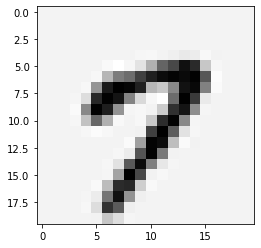

In [66]:
# % Randomly select 100 data points to display
# sel = randperm(size(X, 1));
# sel = sel[1:100];

# displayData(X[sel, :]);

import matplotlib.pyplot as plt
plt.imshow(-X[3500,:].reshape(20,20).T, cmap=plt.get_cmap('gray'))
plt.show()

In [38]:
# %% ================ Part 2: Loading Parameters ================
# % In this part of the exercise, we load some pre-initialized 
# % neural network parameters.

import numpy as np
import scipy

print('\nLoading Saved Neural Network Parameters ...\n')

# % Load the weights into variables Theta1 and Theta2

ex4weights = scipy.io.loadmat('ex4weights.mat')

Theta1 = ex4weights['Theta1']
Theta2 = ex4weights['Theta2']

# load('ex4weights.mat');

# % Unroll parameters 
nn_params = np.append(Theta1 , Theta2)
nn_params = nn_params.reshape(len(nn_params),1)
nn_params.shape


Loading Saved Neural Network Parameters ...



(10285, 1)

In [39]:
def nnCostFunction(nn_params, input_lyr_sz, hidd_lyr_sz, num_lbls, X, y, lmbd):
                                   
    # %NNCOSTFUNCTION Implements the neural network cost function for a two layer
    # %neural network which performs classification
    # %   [J grad] = NNCOSTFUNCTON(nn_params, hidd_lyr_sz, num_lbls, ...
    # %   X, y, lmbd) computes the cost and gradient of the neural network. The
    # %   parameters for the neural network are "unrolled" into the vector
    # %   nn_params and need to be converted back into the weight matrices. 
    # % 
    # %   The returned parameter grad should be a "unrolled" vector of the
    # %   partial derivatives of the neural network.
    # %
    # % Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # % for our 2 layer neural network
    
    import numpy as np
    from sigmoid import sigmoid
    
    Theta1 = np.reshape(nn_params[0:hidd_lyr_sz * (input_lyr_sz + 1)], (hidd_lyr_sz, input_lyr_sz + 1))

    Theta2 = np.reshape(nn_params[hidd_lyr_sz * (input_lyr_sz + 1):], (num_lbls, hidd_lyr_sz + 1))

    # % Setup some useful variables
    m = X.shape[0]

    # % You need to return the following variables correctly 

    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)

    # % Add ones to the X data matrix
    
    X = np.append(np.ones((m,1)), X, axis=1)
    
    # tic #QUE HAGO CON ESTO

    # % ====================== YOUR CODE HERE ======================
    # % Instructions: You should complete the code by working through the
    # %               following parts.
    # %
    # % Part 1: Feedforward the neural network and return the cost in the
    # %         variable J. After implementing Part 1, you can verify that your
    # %         cost function computation is correct by verifying the cost
    # %         computed in ex4.m
    # %

    yVec = np.zeros (( len(y), num_lbls))
    y = y.reshape((len(y),1))

    for k in range(0,num_lbls):
        yVec[:,k] = np.where( y==k+1, 1,0 ).reshape((len(y)))
        
    # Variables' sizes X 5000X401 yVec 5000x10, Theta1 25x401, Theta2 10X26
    # a2 5000X25 a3 

    z2 = np.dot(X, Theta1.T)

    a2 = sigmoid( z2)
    a2 = np.append(np.ones((a2.shape[0],1)), a2, axis=1) # a2 5000X26 
    
    #h_theta
    z3 = np.dot(a2, Theta2.T)

    a3 = sigmoid( z3); # a3 5000X10

    J = (1- yVec) * np.log (1 - a3)

    J = J + yVec * np.log (a3)

    J = - 1/m * np.sum (np.sum( J ))

    J = J + 0.5*lmbd/m*  np.sum( np.sum( Theta1[:,1:]**2)) 

    J = J + 0.5*lmbd/m* np.sum( np.sum( Theta2[:,1:]**2))

    # % Part 2: Implement the backpropagation algorithm to compute the gradients
    # %         Theta1_grad and Theta2_grad. You should return the partial derivatives of
    # %         the cost function with respect to Theta1 and Theta2 in Theta1_grad and
    # %         Theta2_grad, respectively. After implementing Part 2, you can check
    # %         that your implementation is correct by running checkNNGradients
    # %
    # %         Note: The vector y passed into the function is a vector of labels
    # %               containing values from 1..K. You need to map this vector into a 
    # %               binary vector of 1's and 0's to be used with the neural network
    # %               cost function.
    # %
    # %         Hint: We recommend implementing backpropagation using a for-loop
    # %               over the training examples if you are implementing it for the 
    # %               first time.
    # %

    # Variables' sizes X 5000X401 yVec 5000x10, Theta1 25x401, Theta2 10X26
    # a2 5000X25 a3 5000X10

    Delta1 = np.zeros( (hidd_lyr_sz, input_lyr_sz+1) )

    Delta2 = np.zeros( (num_lbls, hidd_lyr_sz+1 ))

    delta3 = a3 - yVec
    
    # delta2 = (  (Theta2' * delta3')' .* ( (a2.*( 1 - a2 )) )) ;
#     ##           26X10      10X5000          5000X26
    delta2 = (  np.dot(Theta2.T, delta3.T) ).T
    
    delta2 = delta2* ( a2*( 1 - a2))
    
    Delta2 = Delta2 + np.dot(delta3.T, a2)
    
    delta1 = np.dot(Theta1.T, delta2[:,1:].T).T
    
    delta1 =  delta1 * ( X* ( 1-X ) )
    
    delta1 = np.sum( delta1)
    
    Delta1 = Delta1 + np.dot(delta2.T, X)[1:,:];  
    
    Theta1_grad = np.zeros( (hidd_lyr_sz, input_lyr_sz+1) )

    Theta2_grad = np.zeros( (num_lbls, hidd_lyr_sz+1 ))
    
    Theta1_grad[:, 1:] = Delta1[:, 1:] / m;

    Theta2_grad[:, 1:] = Delta2[:, 1:] / m;

#     % Part 3: Implement regularization with the cost function and gradients.
#     %
#     %         Hint: You can implement this around the code for
#     %               backpropagation. That is, you can compute the gradients for
#     %               the regularization separately and then add them to Theta1_grad
#     %               and Theta2_grad from Part 2.
#     %
#     Theta1_grad(:,2:end) = Theta1_grad(:,2:end) + lmbd/m * Theta1(:,2:end);

#     Theta2_grad(:,2:end) = Theta2_grad(:,2:end) + lmbd/m * Theta2(:,2:end);

#     % -------------------------------------------------------------

#     % =========================================================================

#     % Unroll gradients
#     grad = [Theta1_grad(:) ; Theta2_grad(:)];

#     tiempos=toc;

    # return [J, grad, tiempos]

    return J

In [40]:
# %% ================ Part 3: Compute Cost (Feedforward) ================
# %  To the neural network, you should first start by implementing the
# %  feedforward part of the neural network that returns the cost only. You
# %  should complete the code in nnCostFunction.m to return cost. After
# %  implementing the feedforward to compute the cost, you can verify that
# %  your implementation is correct by verifying that you get the same cost
# %  as us for the fixed debugging parameters.
# %
# %  We suggest implementing the feedforward cost *without* regularization
# %  first so that it will be easier for you to debug. Later, in part 4, you
# %  will get to implement the regularized cost.
# %
print('\nFeedforward Using Neural Network ...\n')

# % Weight regularization parameter (we set this to 0 here).
lmbd = 0;


Feedforward Using Neural Network ...



In [41]:
# from nnCostFunction import nnCostFunction

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmbd)

print(f'Cost at parameters (loaded from ex4weights): {J} \n(this value should be about 0.287629)\n');

Cost at parameters (loaded from ex4weights): 0.2876291651613189 
(this value should be about 0.287629)



In [42]:
# Time taken to calculate cost function and gradients using unvectorized function
# tiempos

In [43]:
# %% =============== Part 4: Implement Regularization ===============
# %  Once your cost function implementation is correct, you should now
# %  continue to implement the regularization with the cost.
# %

print('\nChecking Cost Function (w/ Regularization) ... \n')

# % Weight regularization parameter (we set this to 1 here).
lmbd = 1;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmbd);

print(f'Cost at parameters (loaded from ex4weights): {J} \n(this value should be about 0.383770)\n');


Checking Cost Function (w/ Regularization) ... 

Cost at parameters (loaded from ex4weights): 0.38376985909092365 
(this value should be about 0.383770)



In [44]:
# %% ================ Part 5: Sigmoid Gradient  ================
# %  Before you start implementing the neural network, you will first
# %  implement the gradient for the sigmoid function. You should complete the
# %  code in the sigmoidGradient.m file.
# %

def sigmoidGradient(z):
# %SIGMOIDGRADIENT returns the gradient of the sigmoid function
# %evaluated at z
# %   g = SIGMOIDGRADIENT(z) computes the gradient of the sigmoid function
# %   evaluated at z. This should work regardless if z is a matrix or a
# %   vector. In particular, if z is a vector or matrix, you should return
# %   the gradient for each element.
    
    import numpy as np
    from sigmoid import sigmoid
    
    z = np.array(z)
    
    g = np.zeros(z.shape)

# % ====================== YOUR CODE HERE ======================
# % Instructions: Compute the gradient of the sigmoid function evaluated at
# %               each value of z (z can be a matrix, vector or scalar).

    g = sigmoid(z) * (1 - sigmoid(z));
    return g

# % =============================================================

In [45]:
print('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient([-1, -0.5, 0, 0.5, 1])
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ')
print(g)


Evaluating sigmoid gradient...

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [46]:
# %% ================ Part 6: Initializing Pameters ================
# %  In this part of the exercise, you will be starting to implment a two
# %  layer neural network that classifies digits. You will start by
# %  implementing a function to initialize the weights of the neural network
# %  (randInitializeWeights.m)

def randInitializeWeights(L_in, L_out):
    # %RANDINITIALIZEWEIGHTS Randomly initialize the weights of a layer with L_in
    # %incoming connections and L_out outgoing connections
    # %   W = RANDINITIALIZEWEIGHTS(L_in, L_out) randomly initializes the weights 
    # %   of a layer with L_in incoming connections and L_out outgoing 
    # %   connections. 
    # %
    # %   Note that W should be set to a matrix of size(L_out, 1 + L_in) as
    # %   the first column of W handles the "bias" terms
    # %

    # % You need to return the following variables correctly 
    W = np.zeros((L_out, 1 + L_in))

    # % ====================== YOUR CODE HERE ======================
    # % Instructions: Initialize W randomly so that we break the symmetry while
    # %               training the neural network.
    # %
    # % Note: The first column of W corresponds to the parameters for the bias unit
    # %

    # % Randomly initialize the weights to small values
    ##epsilon init = 0.12;
    
    epsilon_init = np.sqrt(6)/np.sqrt(L_in + L_out)

    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init

    return W

# % =========================================================================

In [47]:
print('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# % Unroll parameters
initial_nn_params = np.append(initial_Theta1 , initial_Theta2)
initial_nn_params = initial_nn_params.reshape(len(nn_params),1)


Initializing Neural Network Parameters ...



In [48]:
# %% =============== Part 7: Implement Backpropagation ===============
# %  Once your cost matches up with ours, you should proceed to implement the
# %  backpropagation algorithm for the neural network. You should add to the
# %  code you've written in nnCostFunction.m to return the partial
# %  derivatives of the parameters.
# %
print('\nChecking Backpropagation... \n');

# %  Check gradients by running checkNNGradients
# checkNNGradients;


Checking Backpropagation... 



In [49]:
# %% ================ Part 2: Loading Parameters ================
# % In this part of the exercise, we load some pre-initialized 
# % neural network parameters.

import numpy as np
import scipy

print('\nLoading Saved Neural Network Parameters ...\n')

# % Load the weights into variables Theta1 and Theta2

ex4weights = scipy.io.loadmat('ex4weights.mat')

Theta1 = ex4weights['Theta1']
Theta2 = ex4weights['Theta2']

# load('ex4weights.mat');

# % Unroll parameters 
nn_params = np.append(Theta1 , Theta2)
nn_params = nn_params.reshape(len(nn_params),1)
nn_params.shape



nn_params, input_lyr_sz, hidd_lyr_sz, num_lbls, X, y, lmbd = nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lmbd

import scipy.io as scio

# %% Setup the parameters you will use for this exercise
input_layer_size  = 400  #% 20x20 Input Images of Digits
hidden_layer_size = 25   #% 25 hidden units
num_labels = 10          #% 10 labels, from 1 to 10   
                          #% (note that we have mapped "0" to label 10)

# %% =========== Part 1: Loading and Visualizing Data =============
# %  We start the exercise by first loading and visualizing the dataset. 
# %  You will be working with a dataset that contains handwritten digits.
# %

# % Load Training Data
print('Loading and Visualizing Data ...\n')

ex4data1 = scio.loadmat('ex4data1.mat')

X = ex4data1['X']
y = ex4data1['y']

m = X.shape[0]

# %NNCOSTFUNCTION Implements the neural network cost function for a two layer
# %neural network which performs classification
# %   [J grad] = NNCOSTFUNCTON(nn_params, hidd_lyr_sz, num_lbls, ...
# %   X, y, lmbd) computes the cost and gradient of the neural network. The
# %   parameters for the neural network are "unrolled" into the vector
# %   nn_params and need to be converted back into the weight matrices. 
# % 
# %   The returned parameter grad should be a "unrolled" vector of the
# %   partial derivatives of the neural network.
# %
# % Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
# % for our 2 layer neural network

import numpy as np
    
Theta1 = np.reshape(nn_params[0:hidd_lyr_sz * (input_lyr_sz + 1)], (hidd_lyr_sz, input_lyr_sz + 1))

Theta2 = np.reshape(nn_params[hidd_lyr_sz * (input_lyr_sz + 1):], (num_lbls, hidd_lyr_sz + 1))

# % Setup some useful variables
m = X.shape[0]

# % You need to return the following variables correctly 

J = 0
Theta1_grad = np.zeros(Theta1.shape)
Theta2_grad = np.zeros(Theta2.shape)

# % Add ones to the X data matrix

X = np.append(np.ones((m,1)), X, axis=1)

# tic #QUE HAGO CON ESTO

# % ====================== YOUR CODE HERE ======================
# % Instructions: You should complete the code by working through the
# %               following parts.
# %
# % Part 1: Feedforward the neural network and return the cost in the
# %         variable J. After implementing Part 1, you can verify that your
# %         cost function computation is correct by verifying the cost
# %         computed in ex4.m
# %

# labelsVec = np.append(np.zeros((k,1)), 1)
# labelsVec = np.append(labelsVec, np.zeros((num_lbls-k-1, 1)))
# labelsVec = labelsVec.T

import numpy.matlib

# yVec = np.zeros (( len(y), 1, num_lbls+1))

yVec = np.matlib.repmat(y, 1,num_lbls)

for k in range(1,num_lbls+1):
    yVec[:,k-1] = np.where( yVec[:,k-1]==k, 1,0 )

    # idxs = np.find( y==k )

    # WTFFF
    # yVec[ idxs, : ] = repmat(labelsVec, length(idxs), 1)

# Variables' sizes X 5000X401 yVec 5000x10, Theta1 25x401, Theta2 10X26
# a2 5000X25 a3 

z2 = np.dot(X, Theta1.T)

from sigmoid import sigmoid

a2 = sigmoid( z2)
# [np.ones(m, 1) X]
a2 = np.append(np.ones((a2.shape[0],1)), a2, axis=1)
# a2 = [np.ones(a2.shape[0], 1) a2]; # a2 5000X26 

#h_theta
z3 = np.dot(a2, Theta2.T)

# global a3

a3 = sigmoid( z3); # a3 5000X10

print(a3.shape, yVec.shape)

J = (1- yVec) * np.log (1 - a3)

J = J + yVec * np.log (a3)

J = - 1/m * np.sum (np.sum( J ))

J = J + 0.5*lmbd/m*  np.sum( np.sum( Theta1[:,1:]**2)) 

J = J + np.sum( np.sum( Theta2[:,1:]**2))


Loading Saved Neural Network Parameters ...

Loading and Visualizing Data ...

(5000, 10) (5000, 10)
